### Milestone 1 - Instructions
Assume the 591 attributes represent different sensors readings across the manufacturing process. 

Using the SECOM dataset, create a new notebook, and perform each of the following tasks and answer the related questions:

Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
- Read and merge data
- Clean and prepare data
- Visually explore data
- Handle class imbalance problem
- Apply feature selection techniques to reduce dimensionality of data
- Describe your initial findings in a summary section
- Solicit specific feedback on your code (instructions below).

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns

In [52]:
pd.set_option('display.max_columns', 200)

### Read in data

In [53]:
# assign url variable where we will pull data from
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [54]:
# add generic feature column names
names = ["feature" + str(x) for x in range(1, 591)]

In [55]:
# pull down the csv info into a pandas dataframe
data = pd.read_csv(url_data, sep=" ", names=names, header=None, dtype=None)

In [56]:
#check head of data 
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,48.2091,0.7578,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.0004,-

In [57]:
# assign url variable where we will pull classification data from
url_classifications = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [58]:
# assign classification and date to labels
labels = pd.read_csv(url_classifications, sep=" ", names = ["classification","date"],parse_dates = ["date"])

### Merge data

In [59]:
# merge data with classification labels
df = pd.concat([data,labels], axis=1)

In [60]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.

#### Understand the data set

In [61]:
# get length of dataframe
len(df)

1567

In [62]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,...,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.0,1565.000000,1565.000000,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1565.000000,1565.000000,1561.0,1561.0,1561.0,1561.0,549.000000,549.000000,549.000000,852.00000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1559.000000,1559.000000,1559.000000,1565.000000,1565.000000,1565.000000,1565.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.00

In [63]:
#count number of columns by datatype
df.dtypes.value_counts()

float64           590
datetime64[ns]      1
int64               1
dtype: int64

### Clean and prepare data

According to dataset information this data contains null values varying in intensity depending on the individuals features. 

The data is represented in a raw text file each line representing an individual example and the features seperated by spaces. The null values are represented by the 'NaN' value as per MatLab.

In [64]:
#replace missing values with median values
df.fillna(data.median(), inplace=True)

In [65]:
print(df.isnull().sum())

feature1          0
feature2          0
feature3          0
feature4          0
feature5          0
                 ..
feature588        0
feature589        0
feature590        0
classification    0
date              0
Length: 592, dtype: int64


In [66]:
# drop the date column
df = df.drop(['date'], axis=1)

### Explore data

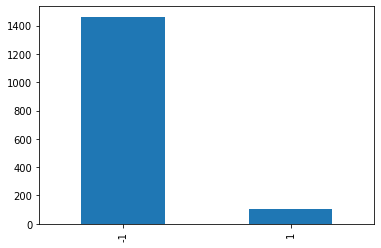

In [68]:
df['classification'].value_counts().plot(kind = 'bar')

#### Define predicators and target

X = All features minus the target, column "classification"

y = classification - simple pass/fail yield for in house line testing

In [69]:
# define X 
X = df.drop('classification', axis=1)

# define y
y = df['classification']

### Handle class imbalance problem

In [72]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({-1: 1463, 1: 1463})


### Apply feature selection techniques to reduce dimensionality of data

### Filter methods

In [77]:
# use corr method to find the pairwise correlation of all columns in the dataframe
corr_matrix = df.corr()
corr_matrix

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
feature1,1.000000,-0.144161,0.004667,-0.006665,-0.010819,NaN,0.002028,0.031347,-0.052735,0.009091,0.006445,0.043432,0.010571,NaN,-0.007191,0.030745,-0.005720,0.012496,0.017997,-0.009350,0.025773,-0.011373,0.032438,-0.046631,-0.015075,0.107802,0.092542,0.106749,0.054828,-0.030918,-0.039741,-0.055994,-0.004630,-0.034015,-0.017629,-0.004498,0.017628,-0.035530,-0.042294,-0.034852,-0.006758,0.040578,NaN,-0.050537,0.053885,0.015588,-0.006072,-0.037488,0.004239,NaN,-0.019961,-0.050516,NaN,0.014775,0.022436,-0.025070,0.015531,-0.021465,-0.012648,-0.105721,-0.036916,0.033285,0.007996,-0.045733,-0.017677,-0.019816,-0.000472,-0.023135,0.033465,NaN,-0.001347,-0.000274,0.000211,0.004123,-0.029430,0.082382,0.025624,0.019914,0.071269,-0.116133,0.008173,0.039421,0.036955,0.006073,0.053791,0.000130,-0.018600,0.050358,-0.029585,-0.012823,0.012190,0.014710,-0.008695,0.003104,-0.006371,-0.040050,0.015871,NaN,-0.032758,-0.059082,...,-0.078953,-0.067407,-0.001867,-0.023709,-0.021932,0.004279,-0.016229,NaN,-0.051857,-0.019719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.062737,-0.019444,NaN,NaN,NaN,NaN,0.059183,0.053406,0.054110,-0.054501,-0.011752,0.014261,0.003484,0.000996,-0.004348,-0.011191,0.000054,-0.084442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080579,-0.024137,0.034325,0.082104,-0.003718,-0.048618,-0.015408,0.024481,0.026908,-0.089867,0.040143,-0.076206,-0.015702,0.038644,-0.092161,-0.017703,0.030178,-0.074258,-0.012310,0.029100,0.041412,0.040516,0.037916,-0.011308,-0.005846,0.062134,0.043867,0.060397,0.044608,0.063064,0.052853,-0.018987,-0.023194,0.013715,-0.002035,0.015242,0.007014,0.013265,0.008639,-0.026802,-0.055462,-0.055845,-0.035265,0.000190,0.023562,0.019994,0.023695,0.018534,-0.025867,-0.028161,0.004185,-0.025100
feature2,-0.144161,1.000000,0.005883,-0.008963,-0.001917,NaN,-0.025222,-0.011761,0.031244,0.024025,0.009529,-0.027042,0.034308,NaN,-0.037730,-0.087226,-0.001812

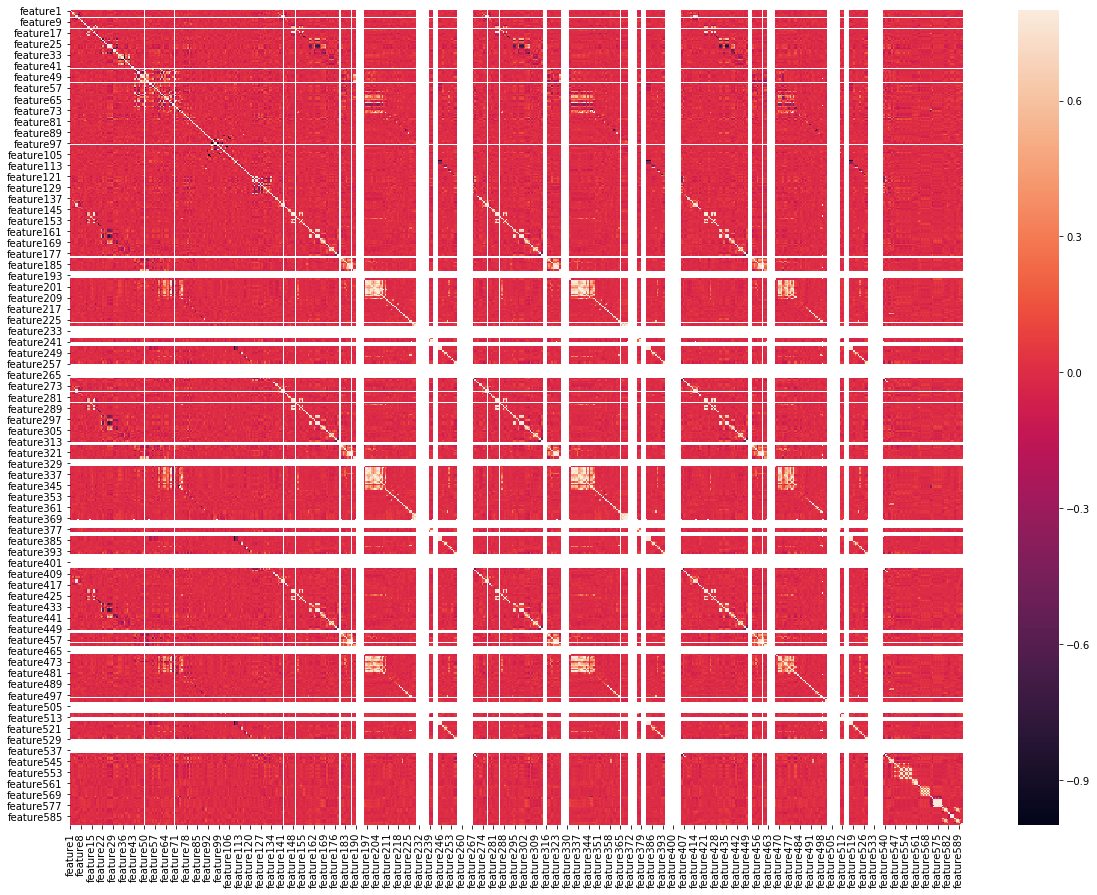

In [78]:
# plot correlation
fig = plt.figure(figsize = (20, 15))

sns.heatmap(corr_matrix, vmax = .8)
plt.show()

In [ ]:
# # Calculation Correlation
# corr = np.corrcoef(X, Y)[0, 1]
# print("Correlation between X and Y is %.2f"%corr)
# Calculate Mutual Information

# from sklearn.metrics import mutual_info_score

# def calc_MI(x, y, bins):
#     c_xy = np.histogram2d(x, y, bins)[0]
#     mi = mutual_info_score(None, None, contingency=c_xy)
#     return mi

# mi = calc_MI(X, Y, 20)
# print("Mutual information=%.2f"%mi)

In [81]:
# sort list by correlation value and print highest 10
corr_list = corr_matrix.sort_values(by=['classification'])
corr_list['classification'][-11:]

feature529   NaN
feature530   NaN
feature531   NaN
feature532   NaN
feature533   NaN
feature534   NaN
feature535   NaN
feature536   NaN
feature537   NaN
feature538   NaN
feature539   NaN
Name: classification, dtype: float64

In [ ]:
##### Remove Nans - drop 0 columns

In [74]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [76]:
mi = calc_MI(X, y, 20)
print("Mutual information=%.2f"%mi)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Stepwise Model Selection

#### Backward model selection

In [ ]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
#print(X[0:10,:]) # print out the first 10 rows
estimator = LinearRegression()
selector = RFE(estimator, 5, step=1)#select 5 features. Step=1 means each step only remove 1 variable from the model
selector = selector.fit(X, y)
print(selector.support_) # The mask of selected features.
print(selector.ranking_) # selected features are ranked 1. The 6th is the one that is removed first,
                         # 2nd is the one that is removed last

#### Forward Stepwise Feature Selection


In [ ]:
# Forward Stepwise Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, # k_features has to be smaller or equal to the number of features. If equal to, it starts from
                         # intercept to the full model
          forward=True,  # forward
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#### LASSO

In [ ]:
# LASSO
from sklearn import linear_model

alpha = 0.5 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

#### Ridge Regression

In [ ]:
# Ridge Regression
from sklearn import linear_model
alpha = 10 
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

import numpy as np
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

### Instructions to Solicit Feedback
Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.